# Playground

In [43]:
%matplotlib inline
import sys
sys.path.insert(0, '../../data/lib/')
from fuzzywuzzy import fuzz
import numpy as np
import pandas as pd
import importlib

import pdfexport
importlib.reload(pdfexport)
import matplotlib

from pdfexport import *
import statistics

In [36]:
df_hcp = pd.read_csv('../../data/3. transformation/5_hcp_grouped.csv')

In [37]:
aggregation = {'name': 'first',
               'location': 'first',
               'address': 'first',
               'type': 'first',
               'year': 'first',
               'donations_grants': 'sum',
               'sponsorship': 'sum',
               'registration_fees': 'sum',
               'travel_accommodation': 'sum',
               'fees': 'sum',
               'related_expenses': 'sum',
               'total': 'sum'
              }

In [38]:
#Group
df = df_hcp[df_hcp.year == 2017].copy()
df.sort_values(by='main_address', inplace=True)

grouped = df.groupby(by=['group']).agg(aggregation)


grouped = grouped.sort_values(['year', 'total'], ascending=False)


### Durchschnitt pro Empfänger

In [46]:
print("Durchschnitt pro Empfänger")
print(grouped['total'].sum() / grouped['total'].count())

print("Median")
print(statistics.median(grouped['total']))

Durchschnitt pro Empfänger
1968.4117934035733
Median
1130.56


### Verteilung

In [40]:
roundto = 1000
grouped['round'] = grouped['total'].apply(lambda x: round(x / roundto) * roundto)
scattered = grouped.groupby(by='round').agg({'name': 'count',
                                            'round': 'first'})

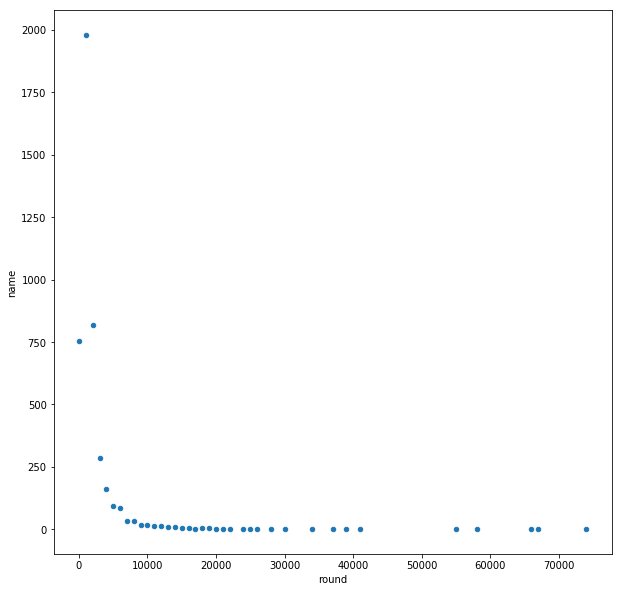

In [41]:
scattered.plot.scatter(x='round', y='name', figsize=(10,10))